# Explorer - Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# auto notebook reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# increase display of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
from explorer import config
from explorer.preprocessing import parse
from explorer.preprocessing.places import JSON_COLUMNS, preprocess_places_data
from explorer.visualization.distributions import plot_counts

## Explore data
We explore data that we obtained from Overture Maps.

In [6]:
df_places = pd.read_csv(config.DATA_DIR / 'raw/places.csv')
df_places.head()

,ogc_fid,wkb_geometry,id,version,update_time,sources,names,categories,confidence,websites,socials,phones,brand,addresses
0,1158,0101000020E610000063D009A183AE00409DF4BEF1B55B...,08f1fb46a3c9029603d842e6b849a37b,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""Carrefour Market"",""common"":null,""r...","{""main"":""supermarket"",""alternate"":[""beauty_and...",0.957203,"[""https://www.carrefour.fr/magasin/market-sain...","[""https://www.facebook.com/108553594074643""]","[""+33130526050""]","{""wikidata"":null,""names"":{""primary"":""Carrefour...","[{""freeform"":""ZAC De Beauplan"",""locality"":""Sai..."
1,1159,0101000020E6100000C765DCD440A300409FCFDB33A65C...,08f1fb46a2a2b14803fb05c9cb2ca3c5,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""La Clairière Paysanne"",""common"":nu...","{""main"":""education"",""alternate"":[""agriculture""...",0.863636,"[""http://laclairierepaysanne.fr""]","[""https://www.facebook.com/113119370735294""]",NaN,NaN,"[{""freeform"":""Rue Théodore Monod"",""locality"":n..."
2,1160,0101000020E61000004A65E5F27AAB0040B4C5DA84205C...,08f1fb46a3c14a9103675b4a3b3a3749,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""RHSelect"",""common"":null,""rules"":null}","{""main"":""professional_services"",""alternate"":null}",0.631300,"[""https://www.rhselect.fr/""]","[""https://www.facebook.com/619166335394718""]","[""+33130479324""]",NaN,"[{""freeform"":""18 Rue des Cèdres"",""locality"":nu..."
3,1161,0101000020E6100000E5B919C979AA0040BE0BA540B05C...,08f1fb46a06d34590309c3116af47921,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""La Place"",""common"":null,""rules"":null}","{""main"":""brewery"",""alternate"":[""restaurant"",""l...",0.957203,"[""http://www.brasserie-la-place.fr/""]","[""https://www.facebook.com/146875502039420""]","[""+33130479033""]",NaN,"[{""freeform"":""2 Place Pierre Bérégovoy"",""local..."
4,1162,0101000020E610000009E1D1C611AB00407BE8CC87B15C...,08f1fb46a06d320003926bd2c9a44bde,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""Cafe Leffe Magny les Hameaux"",""com...","{""main"":""cafe"",""alternate"":[""restaurant""]}",0.331822,NaN,"[""https://www.facebook.com/1666782333627360""]","[""+33899022492""]",NaN,"[{""freeform"":""2 Place Pierre Bérégovoy"",""local..."


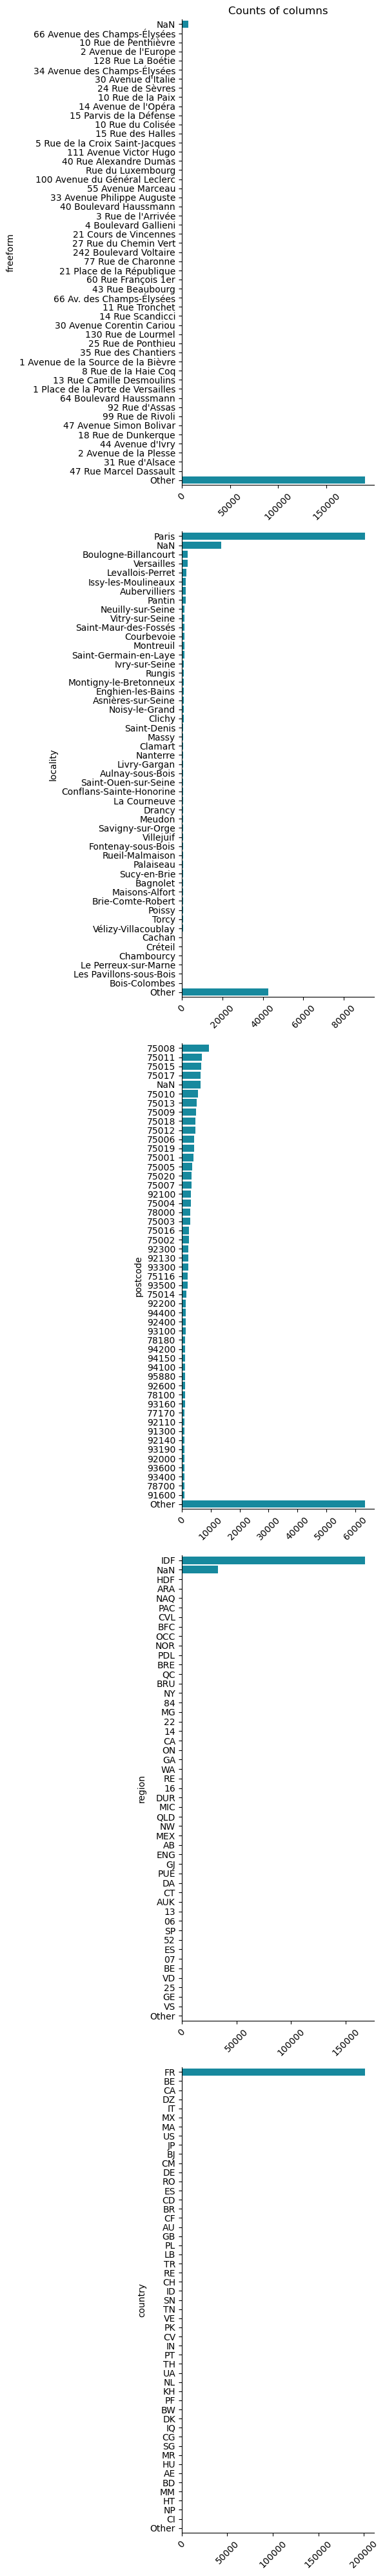

In [62]:
# df_extracted = parse.extract_all_values_column(df_places, column=col, unpack_lists=True)
ax = plot_counts(data=df_extracted, fillna=True, top_n=50)

In [ ]:
# get ax[0] and plot it alone
ax = plot_counts(data=df_extracted, fillna=True, top_n=25)
ax[0].set_title('Top 25 values in column "place"')


Let's start by parsing the JSON columns and plotting the values they contain to see what information they hold.

JSON Column: 'sources'
Columns with cardinality > 50 will not be displayed:
record_id    129285
dtype: int64 


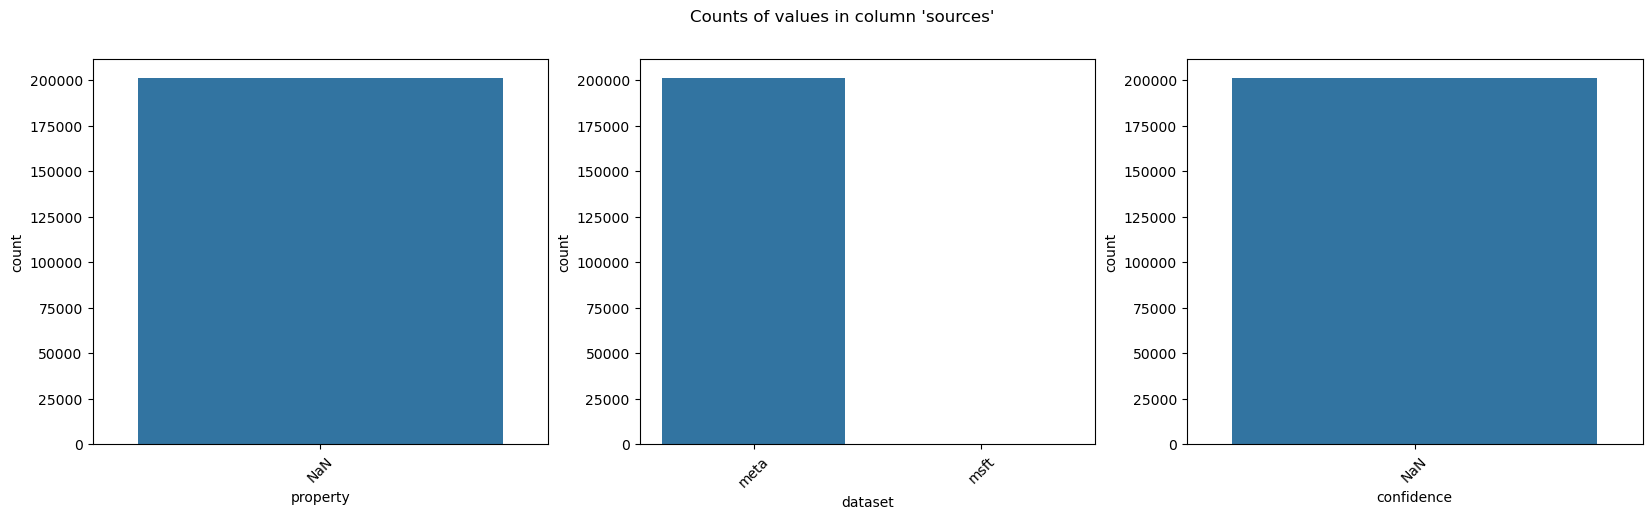

JSON Column: 'names'
Columns with cardinality > 50 will not be displayed:
primary    115629
dtype: int64 


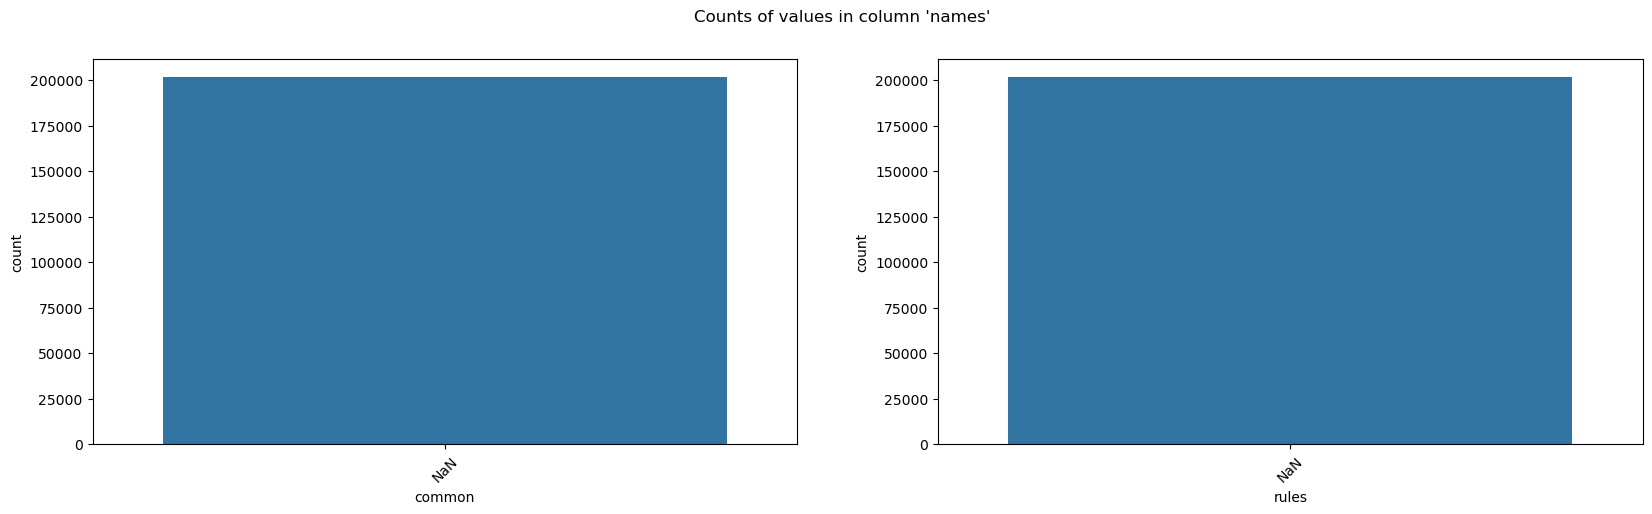

JSON Column: 'categories'
Columns with cardinality > 50 will not be displayed:
main           879
alternate_0    911
alternate_1    876
dtype: int64 
No columns to plot
JSON Column: 'addresses'
Columns with cardinality > 50 will not be displayed:
freeform    77431
locality     1085
postcode     1186
country        75
dtype: int64 


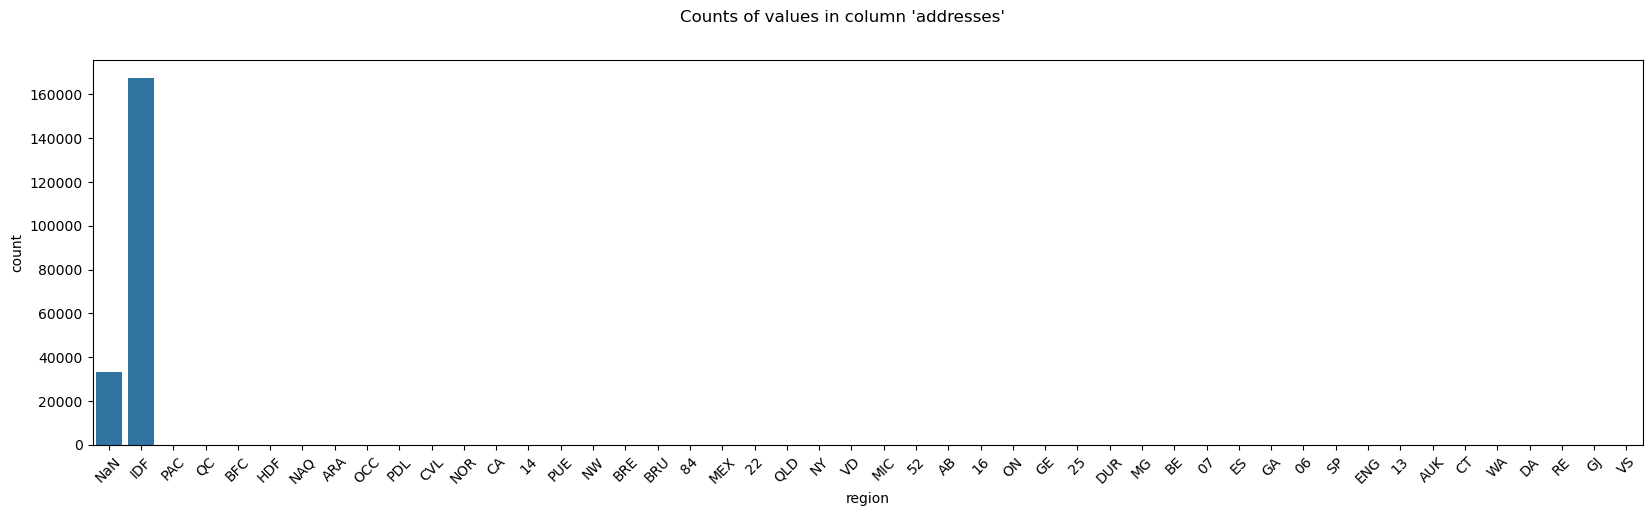

In [7]:
for col in JSON_COLUMNS:
    print(f"JSON Column: '{col}'")
    df_extracted = parse.extract_all_values_column(df_places, column=col, unpack_lists=True)
    ax = plot_counts(data=df_extracted, sup_title=f"Counts of values in column '{col}'", fillna=True, top=25)

<Axes: xlabel='confidence', ylabel='Count'>

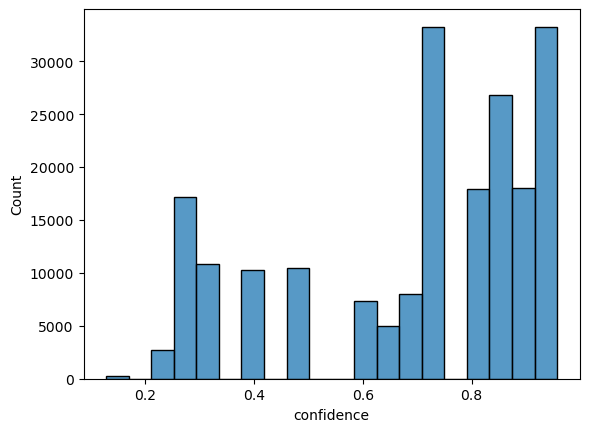

In [17]:
sns.histplot(df_places.confidence, bins=20)

## Preprocess data
Create extended dataset by extracting desired information from json columns.

In [16]:
df_places_full = preprocess_places_data(df_places, save_path=config.DATA_DIR / 'processed/places_full.csv')
df_places_full.head()

,ogc_fid,wkb_geometry,id,version,update_time,confidence,websites,socials,phones,brand,sources_property,sources_dataset,sources_record_id,sources_confidence,names_primary,names_common,names_rules,categories_main,categories_alternate_0,categories_alternate_1,addresses_freeform,addresses_locality,addresses_postcode,addresses_region,addresses_country
0,1158,0101000020E610000063D009A183AE00409DF4BEF1B55B...,08f1fb46a3c9029603d842e6b849a37b,0,2024-06-06 00:00:00+00,0.957203,"[""https://www.carrefour.fr/magasin/market-sain...","[""https://www.facebook.com/108553594074643""]","[""+33130526050""]","{""wikidata"":null,""names"":{""primary"":""Carrefour...",,meta,108553594074643,None,Carrefour Market,None,None,supermarket,beauty_and_spa,bakery,ZAC De Beauplan,Saint-Rémy-lès-Chevreuse,78470,None,FR
1,1159,0101000020E6100000C765DCD440A300409FCFDB33A65C...,08f1fb46a2a2b14803fb05c9cb2ca3c5,0,2024-06-06 00:00:00+00,0.863636,"[""http://laclairierepaysanne.fr""]","[""https://www.facebook.com/113119370735294""]",NaN,NaN,,meta,113119370735294,None,La Clairière Paysanne,None,None,education,agriculture,professional_services,Rue Théodore Monod,None,78114,None,FR
2,1160,0101000020E61000004A65E5F27AAB0040B4C5DA84205C...,08f1fb46a3c14a9103675b4a3b3a3749,0,2024-06-06 00:00:00+00,0.631300,"[""https://www.rhselect.fr/""]","[""https://www.facebook.com/619166335394718""]","[""+33130479324""]",NaN,,meta,619166335394718,None,RHSelect,None,None,professional_services,NaN,NaN,18 Rue des Cèdres,None,78470,None,FR
3,1161,0101000020E6100000E5B919C979AA0040BE0BA540B05C...,08f1fb46a06d34590309c3116af47921,0,2024-06-06 00:00:00+00,0.957203,"[""http://www.brasserie-la-place.fr/""]","[""https://www.facebook.com/146875502039420""]","[""+33130479033""]",NaN,,meta,146875502039420,None,La Place,None,None,brewery,restaurant,lounge,2 Place Pierre Bérégovoy,Magny-les-Hameaux,78114,IDF,FR
4,1162,0101000020E610000009E1D1C611AB00407BE8CC87B15C...,08f1fb46a06d320003926bd2c9a44bde,0,2024-06-06 00:00:00+00,0.331822,NaN,"[""https://www.facebook.com/1666782333627360""]","[""+33899022492""]",NaN,,meta,1666782333627360,None,Cafe Leffe Magny les Hameaux,None,None,cafe,restaurant,NaN,2 Place Pierre Bérégovoy,Magny-les-Hameaux,78114,IDF,FR


## Visualization

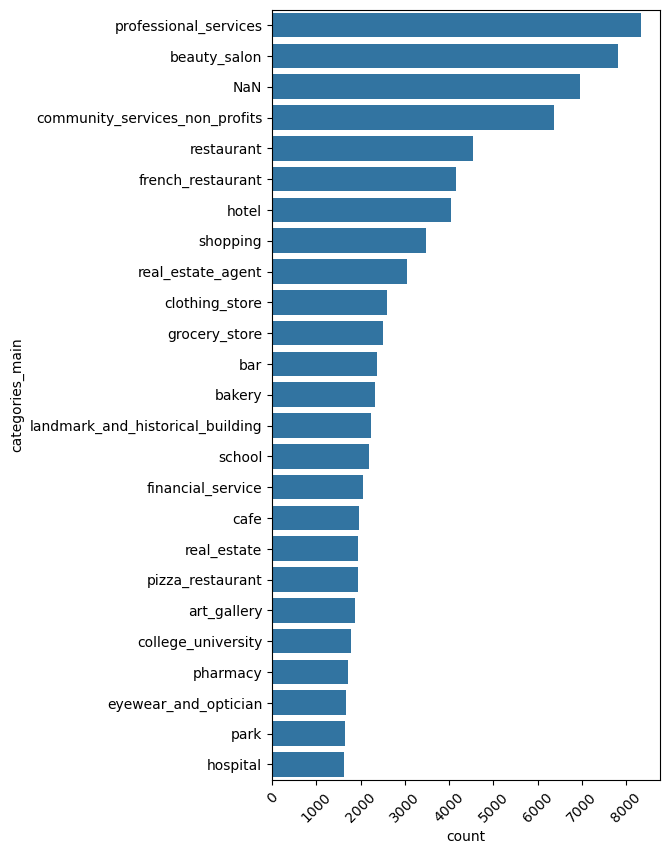

<Axes: xlabel='count', ylabel='categories_main'>

In [26]:
plot_counts(data=df_places_full, columns='categories_main', fillna=True, top_n=25)

## Focus on nature places

In [7]:
df_nature_places = pd.read_csv(config.DATA_DIR / 'raw/nature_places.csv')
df_nature_places.head()

,ogc_fid,wkb_geometry,id,version,update_time,sources,names,categories,confidence,websites,socials,phones,brand,addresses,nature_score
0,3959,0101000020E61000003E05C07806CD0040B2632310AF67...,08f1fb46323a2a6e036ffdafc648587c,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""Gran Canal de Versalles"",""common"":...","{""main"":""lake"",""alternate"":[""landmark_and_hist...",0.614162,NaN,"[""https://www.facebook.com/487018837994776""]",NaN,NaN,"[{""freeform"":null,""locality"":""Versailles"",""pos...",1.0
1,2728,0101000020E6100000F0C4AC1743B9FF3F28B9C326326A...,08f1fb47858de4ed03a06fbe4b636bdc,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""Eden Park"",""common"":null,""rules"":n...","{""main"":""park"",""alternate"":[""clothing_store"",""...",0.835408,"[""https://www.eden-park.fr/fr_fr""]","[""https://www.facebook.com/104764371150585""]","[""+33173130120""]",NaN,"[{""freeform"":""2 Rue du Président Kennedy"",""loc...",1.0
2,2762,0101000020E6100000A7B393C151F2FF3F3332C85D8469...,08f1fb478522d74303af45fdadfde6bb,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""Ecole Maternelle Nouveau Cottage"",...","{""main"":""cottage"",""alternate"":[""home_service"",...",0.405652,"[""http://www.lesclayessousbois.fr""]","[""https://www.facebook.com/319348658839768""]","[""+10134623848""]",NaN,"[{""freeform"":""1 Rue Tristan Bernard"",""locality...",0.5
3,2848,0101000020E6100000342C465D6BAFFF3FCBDAA6785C6D...,08f1fb47a160214b03d5acc62d186be9,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""GolfSkills"",""common"":null,""rules"":...","{""main"":""golf_course"",""alternate"":[""golf_instr...",0.957203,"[""http://www.golfskills.fr""]","[""https://www.facebook.com/567263163724589""]","[""+33134980150""]",NaN,"[{""freeform"":""4 Rue de Gally"",""locality"":""Chav...",0.7
4,2877,0101000020E6100000E9769BDC94F7FF3FC16158B4EF6D...,08f1fb47ac406c980380cdbd3c04ff04,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""Il était une ferme"",""common"":null,...","{""main"":""farm"",""alternate"":null}",0.749074,"[""https://www.iletaituneferme-mediationanimale...","[""https://www.facebook.com/100707955779855""]","[""+33659015420""]",NaN,"[{""freeform"":""33 Rue des Ormes, Saint-Nom-la-B...",0.6


In [8]:
df_nature_places_full = preprocess_places_data(df_nature_places, save_path=config.DATA_DIR / 'processed/nature_places_parsed.csv')
df_nature_places_full.head()

,ogc_fid,wkb_geometry,id,version,update_time,confidence,websites,socials,phones,brand,nature_score,sources_property,sources_dataset,sources_record_id,sources_confidence,names_primary,names_common,names_rules,categories_main,categories_alternate_0,categories_alternate_1,addresses_freeform,addresses_locality,addresses_postcode,addresses_region,addresses_country
0,3959,0101000020E61000003E05C07806CD0040B2632310AF67...,08f1fb46323a2a6e036ffdafc648587c,0,2024-06-06 00:00:00+00,0.614162,NaN,"[""https://www.facebook.com/487018837994776""]",NaN,NaN,1.0,,meta,487018837994776,None,Gran Canal de Versalles,None,None,lake,landmark_and_historical_building,park,None,Versailles,None,None,FR
1,2728,0101000020E6100000F0C4AC1743B9FF3F28B9C326326A...,08f1fb47858de4ed03a06fbe4b636bdc,0,2024-06-06 00:00:00+00,0.835408,"[""https://www.eden-park.fr/fr_fr""]","[""https://www.facebook.com/104764371150585""]","[""+33173130120""]",NaN,1.0,,meta,104764371150585,None,Eden Park,None,None,park,clothing_store,sporting_goods,2 Rue du Président Kennedy,Les Clayes-sous-Bois,78340,IDF,FR
2,2762,0101000020E6100000A7B393C151F2FF3F3332C85D8469...,08f1fb478522d74303af45fdadfde6bb,0,2024-06-06 00:00:00+00,0.405652,"[""http://www.lesclayessousbois.fr""]","[""https://www.facebook.com/319348658839768""]","[""+10134623848""]",NaN,0.5,,meta,319348658839768,None,Ecole Maternelle Nouveau Cottage,None,None,cottage,home_service,school,1 Rue Tristan Bernard,Les Clayes-sous-Bois,78340,IDF,FR
3,2848,0101000020E6100000342C465D6BAFFF3FCBDAA6785C6D...,08f1fb47a160214b03d5acc62d186be9,0,2024-06-06 00:00:00+00,0.957203,"[""http://www.golfskills.fr""]","[""https://www.facebook.com/567263163724589""]","[""+33134980150""]",NaN,0.7,,meta,567263163724589,None,GolfSkills,None,None,golf_course,golf_instructor,NaN,4 Rue de Gally,Chavenay,78450,IDF,FR
4,2877,0101000020E6100000E9769BDC94F7FF3FC16158B4EF6D...,08f1fb47ac406c980380cdbd3c04ff04,0,2024-06-06 00:00:00+00,0.749074,"[""https://www.iletaituneferme-mediationanimale...","[""https://www.facebook.com/100707955779855""]","[""+33659015420""]",NaN,0.6,,meta,100707955779855,None,Il était une ferme,None,None,farm,NaN,NaN,"33 Rue des Ormes, Saint-Nom-la-Bretèche",None,78860,None,FR


/Users/dknoors/Projects/explorer/explorer/visualization/distributions.py:39: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#0098b5'` for the same effect.

  sns.countplot(data=data, y=col, hue=hue, ax=ax_i, order=top_categories + ['Other'], color=format.PALETTE_BLUE[2])


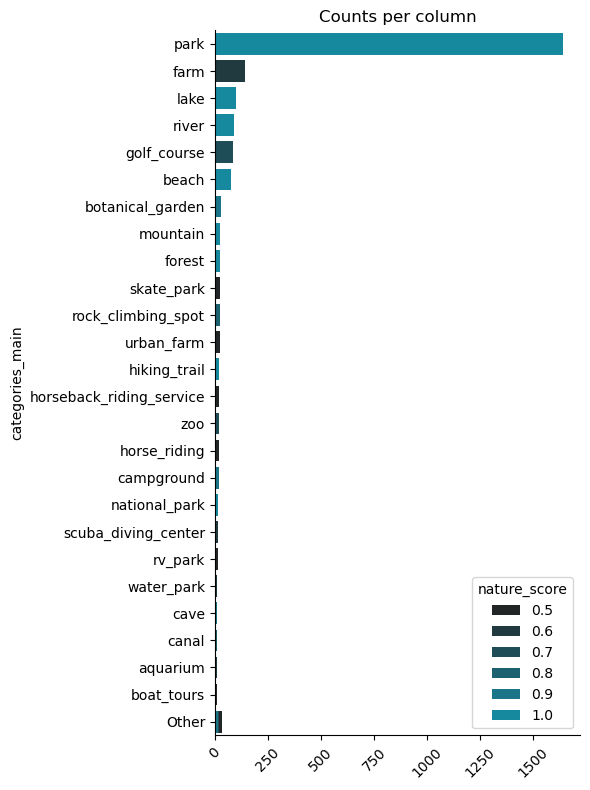

<Axes: title={'center': 'Counts per column'}, ylabel='categories_main'>

In [13]:
plot_counts(data=df_nature_places_full, columns='categories_main', fillna=True, hue='nature_score', top_n=25)

In [11]:
df_nature_places_full.shape

(2562, 26)